In [134]:
!pip install pandas

     |████████████████████████████████| 11.5 MB 872 kB/s eta 0:00:01
     |████████████████████████████████| 503 kB 31.1 MB/s eta 0:00:01


In [135]:
# imports 
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import sklearn
import emoji
import time
print(emoji.emojize('Hi there! :revolving_hearts:'))

Hi there! 💞


## A simple regression problem 
#### For understanding how pytorch works we will start with a very simple example of learning an hidden linear regression function with parameter a and b and a single feature x!
###  $$y = a +bx  +\varepsilon$$ ###

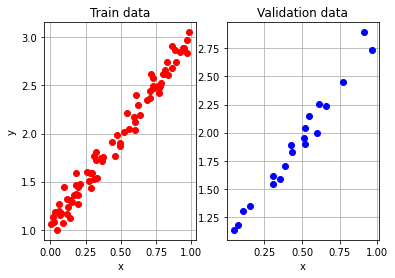

In [47]:

# Real Parameters
a = 1
b = 2
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = a + b * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Plot generated data
plt.subplot(1, 2, 1)
plt.plot(x_train, y_train, 'ro')
plt.title('Train data')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(x_val, y_val, 'bo')
plt.title('Validation data')
plt.xlabel('time (s)')
plt.xlabel('x')
plt.grid()

plt.show()

## Gradient Decsnet 
#### let's start with a simple loss function like a mean square error: 
$$MSE = \frac{1}{N}\sum_{i=1}^{N}{(\hat{y}-y)^2}$$
$$MSE = \frac{1}{N}\sum_{i=1}^{N}{(\hat{a}x+\hat{b}-y)^2}$$

#### now we will find the Gradient of the loss function:
$$\nabla MSE = \left(\frac{\partial{MSE}}{\partial{\hat{a}}}, \frac{\partial{MSE}}{\partial{\hat{b}}}\right)
\newline
\frac{\partial{MSE}}{\partial{\hat{a}}} =
\sum_{i=1}^{N}{\frac{\partial{MSE}}{\partial{\hat{y_{i}}}} \cdot \frac{\partial{\hat{y_{i}}}}{\partial{\hat{a}}}} = 
\frac{1}{N}\sum_{i=1}^{N}{2(\hat{y_{i}}-y_{i})} \cdot 1 = 
2 \frac{1}{N}\sum_{i=1}^{N}{(\hat{y_{i}}-y_{i})}
\newline
\frac{\partial{MSE}}{\partial{\hat{b}}} =
\sum_{i=1}^{N}{\frac{\partial{MSE}}{\partial{\hat{y_{i}}}} \cdot \frac{\partial{\hat{y_{i}}}}{\partial{\hat{b}}}} = 
\frac{1}{N}\sum_{i=1}^{N}{2(\hat{y_{i}}-y_{i})} \cdot x_{i} = 
2 \frac{1}{N}\sum_{i=1}^{N}{x_{i}(\hat{y_{i}}-y_{i})}
$$

### In the following illustration imagine the manifold is a manifold of the loss functions with axes of parameters a and b:
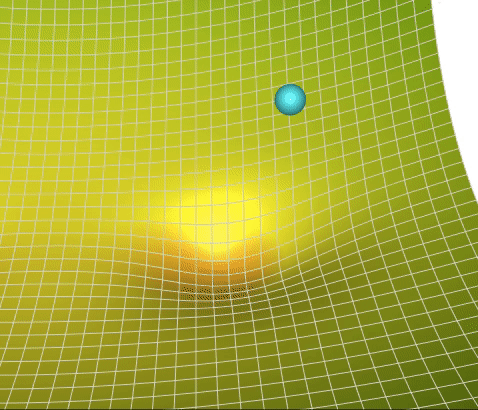


## Update the paramteres 
#### Since our goal is to mimimize the loss function, we will do that by going to the "downhill" of the  loss manifold, to the opposite direction of the gradient: 
$$MSE = \frac{1}{N}\sum_{i=1}^{N}{(\hat{y}-y)^2}$$
$$MSE = \frac{1}{N}\sum_{i=1}^{N}{(\hat{a}x+\hat{b}-y)^2}$$

#### now we will find the Gradient of the loss function:
$$\nabla MSE = \left(\frac{\partial{MSE}}{\partial{\hat{a}}}, \frac{\partial{MSE}}{\partial{\hat{b}}}\right)
\newline
\frac{\partial{MSE}}{\partial{\hat{a}}} =
\sum_{i=1}^{N}{\frac{\partial{MSE}}{\partial{\hat{y_{i}}}} \cdot \frac{\partial{\hat{y_{i}}}}{\partial{\hat{a}}}} = 
\frac{1}{N}\sum_{i=1}^{N}{2(\hat{y_{i}}-y_{i})} \cdot 1 = 
2 \frac{1}{N}\sum_{i=1}^{N}{(\hat{y_{i}}-y_{i})}
\newline
\frac{\partial{MSE}}{\partial{\hat{b}}} =
\sum_{i=1}^{N}{\frac{\partial{MSE}}{\partial{\hat{y_{i}}}} \cdot \frac{\partial{\hat{y_{i}}}}{\partial{\hat{b}}}} = 
\frac{1}{N}\sum_{i=1}^{N}{2(\hat{y_{i}}-y_{i})} \cdot x_{i} = 
2 \frac{1}{N}\sum_{i=1}^{N}{x_{i}(\hat{y_{i}}-y_{i})}
$$

In [305]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a_init = np.random.randn(1)
b_init = np.random.randn(1)
a = a_init
b = b_init
a_list = []
b_list = []
loss_list = []
print(f"Initial random a and b values: {a.item():.3f}, {b.item():.3f}")

# Sets learning rate
lr = 0.5e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    # add data to lists
    a_list.append(a.item())
    b_list.append(b.item())
    loss_list.append(loss)
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(f"Our estimated a and b are: {a.item():.3f}, {b.item():.3f}")

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(f"Sanity check of estimating a and b using sklearn library: {linr.intercept_.item():.3f}, {linr.coef_[0].item():.3f}")

Initial random a and b values: 0.497, -0.138
Our estimated a and b are: 1.024, 1.968
Sanity check of estimating a and b using sklearn library: 1.024, 1.969


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


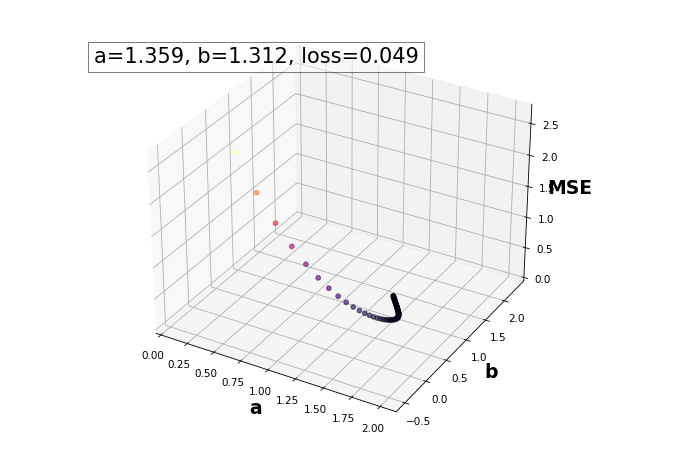

In [349]:
from matplotlib import cm
from matplotlib import colors
%matplotlib auto
cmap = cm.magma
# Create Figure

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection='3d')
# ax.plot_surface(A, B, Z, alpha = 0.5)
ax.set_xlim(min(a_list)-0.5, max(a_list)+0.5)
ax.set_ylim(min(b_list)-0.5, max(b_list)+0.5)
ax.set_zlim(0, max(loss_list))
ax.set_xlabel('a', fontweight ='bold', fontsize=18)
ax.set_ylabel('b', fontweight ='bold', fontsize=18)
ax.set_zlabel('MSE', fontweight ='bold', fontsize=18)
title = ax.text(0,25,28, "", 
                transform=ax.transAxes,bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, ha="center", fontsize=20)
# Plot Graph


scatter_plot = ax.scatter3D([],[],[])
# Define Update function

def r3(num):
    return round(num,3)

def update(i):
    scatter_plot._offsets3d = (a_list[:i], b_list[:i], loss_list[:i])
    scatter_plot.set_color(cmap(norm(loss_list[:i])))
    title.set_text(f"a={a_list[i]:.3f}, b={b_list[i]:.3f}, loss={loss_list[i]:.3f}")
    time.sleep(0.4*(2**(-0.005*i**4)))
    
# Set annimation


ani = anim.FuncAnimation(fig, update, frames=len(a_list), interval=50)


# Show

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


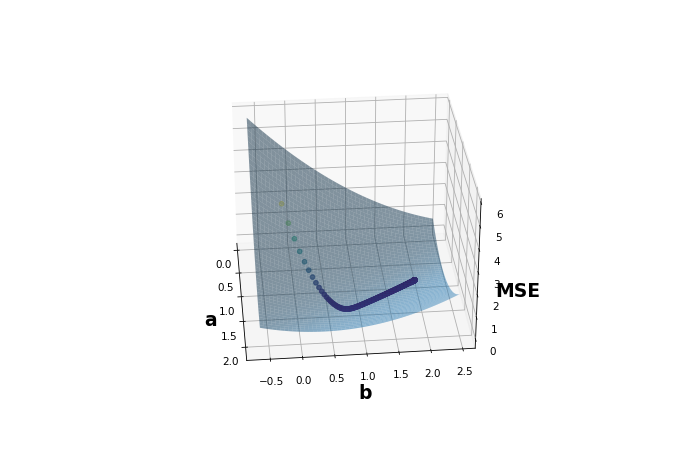

Text(0.5, 0, 'MSE')

In [351]:
a_grid = np.linspace(min(a_list+list(a_init))-0.5,max(a_list+list(a_init))+0.5,50)
b_grid = np.linspace(min(b_list+list(b_init))-0.5,max(b_list+list(b_init))+0.5,50)
A,B = np.meshgrid(a_grid, b_grid)
zs = np.array([((a + b * x_train - y_train)**2).mean() for a,b in zip(np.ravel(A),np.ravel(B))])
Z = zs.reshape(A.shape)

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, Z, alpha = 0.5)
ax.scatter(a_list, b_list, loss_list, c=loss_list)
ax.set_xlabel('a', fontweight ='bold', fontsize=18)
ax.set_ylabel('b', fontweight ='bold', fontsize=18)
ax.set_zlabel('MSE', fontweight ='bold', fontsize=18)


In [200]:
[1]+[2]

[1, 2]